In [31]:
### import libraries

# For dl modeling
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# For number-crunching
import numpy as np
import scipy.stats as stats

# For data management
import pandas as pd

# For data visualitsation
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep = ';')

In [62]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [64]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

<AxesSubplot:xlabel='quality', ylabel='count'>

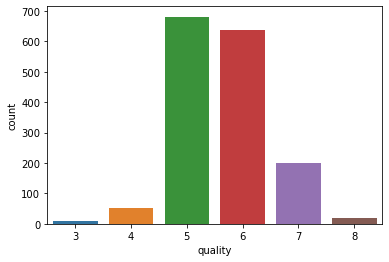

In [65]:
sns.countplot(data = data, x = 'quality')

In [66]:
data = data[data['total sulfur dioxide'] < 200]

In [67]:
data['boolQuality'] = 0
data['boolQuality'][data['quality'] > 5] = 1
data[['quality', 'boolQuality']]

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_63041/196257865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolQuality'][data['quality'] > 5] = 1


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [96]:
X = data.drop(['quality', 'boolQuality'], axis = 1)

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
dtypes: float64(11)
memory usage: 214.3 KB


In [98]:
y = data['boolQuality']

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
X = scaler.fit_transform(X)

In [101]:
dataT = torch.tensor(X).float()
labels = torch.tensor(y.values).float()
print(dataT.shape)
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])


In [102]:
labels = labels[:, None]
print(labels.shape)

torch.Size([1597, 1])


In [103]:
X_train, X_test, y_train, y_test = train_test_split(dataT, labels, test_size=0.2, random_state=42)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, shuffle = True, batch_size = 16, drop_last=True)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [104]:
for X, y in train_loader:
    print(X.shape, y.shape)

torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 

In [119]:
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(11, 16)
        
        self.fc1 = nn.Linear(16, 32)
        self.bnorm1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(32, 32)
        self.bnorm2 = nn.BatchNorm1d(32)
        
        self.output = nn.Linear(32, 1)
        
    def forward(self, x, doBN):
        x = F.relu(self.input(x))
        
        if doBN:
            x = self.bnorm1(x)
            x = self.fc1(x)
            x = F.relu(x)
            
            x = self.bnorm2(x)
            x = self.fc2(x)
            x = F.relu(x)
            
            x = self.output(x)
        else:
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.output(x)
        
        return x

In [127]:
def create_model():
    net = ANNwine()
    
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)
    
    return net, lossfun, optimizer

In [128]:
numepochs = 1000

def train_model(model, lossfun, optimizer, doBN):
    train_acc = []
    test_acc = []
    losses = []
    
    for epochi in range(numepochs):
        batch_acc = []
        batch_loss = []
        
        for X, y in train_loader:
            yHat = model(X, doBN)
            loss = lossfun(yHat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = 100 * torch.mean(((yHat>0) == y).float()).item()
            batch_acc.append(acc)
            batch_loss.append(loss.item())
        
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        model.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = model(X, doBN)
        
        acc = 100 * torch.mean(((yHat > 0) == y).float()).item()
        test_acc.append(acc)
        
    return train_acc, test_acc, losses

In [129]:
model, lossfun, optimizer = create_model()
train_acc, test_acc, losses = train_model(model, lossfun, optimizer, True)

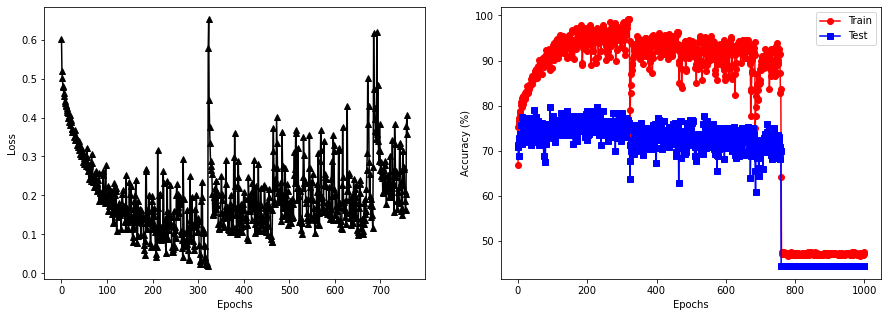

In [130]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')

ax[1].plot(train_acc,'ro-')
ax[1].plot(test_acc,'bs-')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])

plt.show()